In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings;
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import tushare as ts

In [3]:
# 重要函数： np.sign()
date = '2014-01-20'
type(date)

str

In [4]:
date = pd.to_datetime('2014-01-02')
type(date)

pandas._libs.tslibs.timestamps.Timestamp

### 数据准备

In [21]:
data = ts.get_k_data('hs300',start='2010-01-01',end='2017-06-27')[['date','close']]

In [22]:
data = pd.DataFrame(data)

In [23]:
data.rename(columns={'close':'price'},inplace=True)

In [24]:
data.set_index('date',inplace=True)

In [25]:
data.head()

,price
date,
2010-01-04,3535.229
2010-01-05,3564.038
2010-01-06,3541.727
2010-01-07,3471.456
2010-01-08,3480.130


In [26]:
# 计算收益
data['returns'] = np.log(data['price']/data['price'].shift(1))

In [27]:
data['position'] = np.sign(data['returns'])

In [28]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [29]:
data.head()

,price,returns,position,strategy
date,,,,
2010-01-04,3535.229,NaN,NaN,NaN
2010-01-05,3564.038,0.008116,1.0,NaN
2010-01-06,3541.727,-0.006280,-1.0,-0.006280
2010-01-07,3471.456,-0.020040,-1.0,0.020040
2010-01-08,3480.130,0.002496,1.0,-0.002496


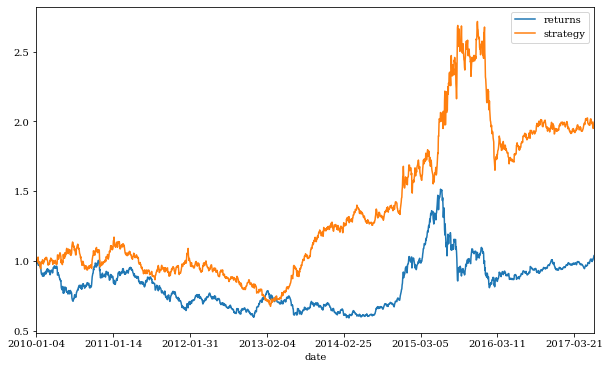

In [30]:
## 数据可视化
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

### 当观察时间间隔为一天时，交易过于频繁，不太现实，需要对现有的策略进行优化

In [32]:
data['position5'] = np.sign(data['returns'].rolling(5).mean())

In [33]:
data['strategy2'] = data['position5'].shift(1) * data['returns']

In [34]:
data.head(20)

,price,returns,position,strategy,position5,strategy2
date,,,,,,
2010-01-04,3535.229,NaN,NaN,NaN,NaN,NaN
2010-01-05,3564.038,0.008116,1.0,NaN,NaN,NaN
2010-01-06,3541.727,-0.006280,-1.0,-0.006280,NaN,NaN
2010-01-07,3471.456,-0.020040,-1.0,0.020040,NaN,NaN
2010-01-08,3480.130,0.002496,1.0,-0.002496,NaN,NaN
2010-01-11,3482.052,0.000552,1.0,0.000552,-1.0,NaN
2010-01-12,3534.916,0.015068,1.0,0.015068,-1.0,-0.015068
2010-01-13,3421.144,-0.032715,-1.0,-0.032715,-1.0,0.032715
2010-01-14,3469.051,0.013906,1.0,-0.013906,-1.0,-0.013906


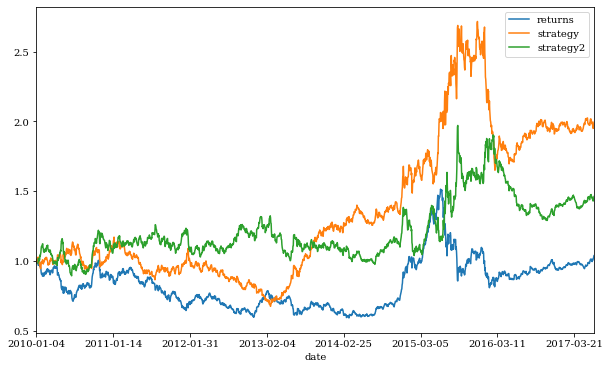

In [35]:
data[['returns','strategy','strategy2']].cumsum().apply(np.exp).plot(figsize=(10,6))

### 参数寻优

In [47]:
data['return_dis'] = data['price'] / data['price'].shift(1) - 1

In [48]:
data['return_dis_cum'] = (data['return_dis'] + 1).cumprod()

In [49]:
data.head()

,price,returns,position,strategy,position5,strategy2,return_dis,return_dis_cum,position_10d,strategy_10d,sty_cumr_10d,position_20d,strategy_20d,sty_cumr_20d,position_30d,strategy_30d,sty_cumr_30d,position_60d,strategy_60d,sty_cumr_60d
date,,,,,,,,,,,,,,,,,,,,
2010-01-04,3535.229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,-1,NaN,NaN,-1,NaN,NaN,-1,NaN,NaN
2010-01-05,3564.038,0.008116,1.0,NaN,NaN,NaN,0.008149,1.008149,-1,-0.008116,0.991884,-1,-0.008116,0.991884,-1,-0.008116,0.991884,-1,-0.008116,0.991884
2010-01-06,3541.727,-0.006280,-1.0,-0.006280,NaN,NaN,-0.006260,1.001838,-1,0.006280,0.998113,-1,0.006280,0.998113,-1,0.006280,0.998113,-1,0.006280,0.998113
2010-01-07,3471.456,-0.020040,-1.0,0.020040,NaN,NaN,-0.019841,0.981961,-1,0.020040,1.018115,-1,0.020040,1.018115,-1,0.020040,1.018115,-1,0.020040,1.018115
2010-01-08,3480.130,0.002496,1.0,-0.002496,NaN,NaN,0.002499,0.984414,-1,-0.002496,1.015574,-1,-0.002496,1.015574,-1,-0.002496,1.015574,-1,-0.002496,1.015574


In [50]:
price_plot = ['return_dis_cum']

for day in [10,20,30,60]:
    price_plot.append('sty_cumr_%dd' % day)
    data['position_%dd' % day] = np.where(data['returns'].rolling(day).mean() > 0,1,-1)
    data['strategy_%dd' % day] = data['position_%dd' % day].shift(1) * data['returns']
    # 累计收益
    data['sty_cumr_%dd' % day] = (data['strategy_%dd' % day] + 1).cumprod()

In [51]:
price_plot

['return_dis_cum',
 'sty_cumr_10d',
 'sty_cumr_20d',
 'sty_cumr_30d',
 'sty_cumr_60d']

In [52]:
data

,price,returns,position,strategy,position5,strategy2,return_dis,return_dis_cum,position_10d,strategy_10d,sty_cumr_10d,position_20d,strategy_20d,sty_cumr_20d,position_30d,strategy_30d,sty_cumr_30d,position_60d,strategy_60d,sty_cumr_60d
date,,,,,,,,,,,,,,,,,,,,
2010-01-04,3535.229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,-1,NaN,NaN,-1,NaN,NaN,-1,NaN,NaN
2010-01-05,3564.038,0.008116,1.0,NaN,NaN,NaN,0.008149,1.008149,-1,-0.008116,0.991884,-1,-0.008116,0.991884,-1,-0.008116,0.991884,-1,-0.008116,0.991884
2010-01-06,3541.727,-0.006280,-1.0,-0.006280,NaN,NaN,-0.006260,1.001838,-1,0.006280,0.998113,-1,0.006280,0.998113,-1,0.006280,0.998113,-1,0.006280,0.998113
2010-01-07,3471.456,-0.020040,-1.0,0.020040,NaN,NaN,-0.019841,0.981961,-1,0.020040,1.018115,-1,0.020040,1.018115,-1,0.020040,1.018115,-1,0.020040,1.018115
2010-01-08,3480.130,0.002496,1.0,-0.002496,NaN,NaN,0.002499,0.984414,-1,-0.002496,1.015574,-1,-0.002496,1.015574,-1,-0.002496,1.015574,-1,-0.002496,1.015574
2010-01-11,3482.052,0.000552,1.0,0.000552,-1.0,NaN,0.000552,0.984958,-1,-0.000552,1.015014,-1,-0.000552,1.015014,-1,-0.000552,1.015014,-1,-0.000552,1.015014
2010-01-12,3534.916,0.015068,1.0,0.015068,-1.0,-0.015068,0.015182,0.999911,-1,-0.015068,0.999720,-1,-0.015068,0.999720,-1,-0.015068,0.999720,-1,-0.015068,0.999720
2010-01-13,3421.144,-0.032715,-1.0,-0.032715,-1.0,0.032715,-0.032185,0.967729,-1,0.032715,1.032425,-1,0.032715,1.032425,-1,0.032715,1.032425,-1,0.032715,1.032425
2010-01-14,3469.051,0.013906,1.0,-0.013906,-1.0,-0.013906,0.014003,0.981280,-1,-0.013906,1.018068,-1,-0.013906,1.018068,-1,-0.013906,1.018068,-1,-0.013906,1.018068


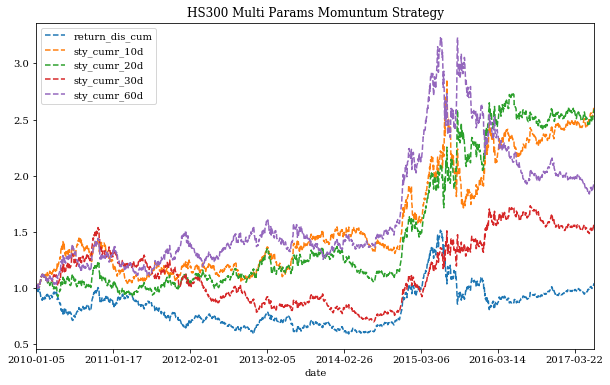

In [53]:
data[price_plot].dropna().plot(
    title = 'HS300 Multi Params Momuntum Strategy',
    figsize = (10,6),
    style = ['--','--','--','--','--']
)

### 高频交易

In [57]:
# 选取数据
hs300_hf = ts.get_k_data('hs300',ktype='5')

In [59]:
# 设置时间索引
hs300_hf.set_index('date',inplace=True)

In [66]:
hs300_hf.index = pd.to_datetime(hs300_hf.index)

In [67]:
hs300_hf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 482 entries, 2020-01-09 14:55:00 to 2020-01-23 15:00:00
Data columns (total 8 columns):
open             482 non-null float64
close            482 non-null float64
high             482 non-null float64
low              482 non-null float64
volume           482 non-null float64
amount           482 non-null object
turnoverratio    482 non-null object
code             482 non-null object
dtypes: float64(5), object(3)
memory usage: 53.9+ KB


In [79]:
# 选取一段时间
hs300_hf['2020-01-09':'2020-01-23']

,open,close,high,low,volume,amount,turnoverratio,code
date,,,,,,,,
2020-01-09 14:55:00,4161.15,4162.96,4163.63,4161.15,3990174.0,{},0.0000,hs300
2020-01-09 15:00:00,4163.18,4164.37,4164.40,4162.63,2628699.0,{},0.0000,hs300
2020-01-10 09:35:00,4177.58,4171.71,4180.98,4169.53,10647342.0,{},0.0000,hs300
2020-01-10 09:40:00,4171.71,4161.28,4171.71,4160.92,5608866.0,{},0.0000,hs300
2020-01-10 09:45:00,4161.28,4160.52,4166.03,4159.98,4367803.0,{},0.0000,hs300
2020-01-10 09:50:00,4160.52,4169.44,4169.44,4160.40,4148176.0,{},0.0000,hs300
2020-01-10 09:55:00,4169.44,4168.50,4169.51,4165.99,3882533.0,{},0.0000,hs300
2020-01-10 10:00:00,4169.13,4158.39,4169.53,4158.31,4096729.0,{},0.0000,hs300
2020-01-10 10:05:00,4158.39,4154.14,4159.51,4153.77,3439854.0,{},0.0000,hs300


In [81]:
hs300_hf['returns'] = np.log(hs300_hf['close'] / hs300_hf['close'].shift(1))

In [83]:
hs300_hf['position'] = np.sign(hs300_hf['returns'].rolling(10).mean())

In [84]:
hs300_hf['strategy'] = hs300_hf['position'].shift(1) * hs300_hf['returns']

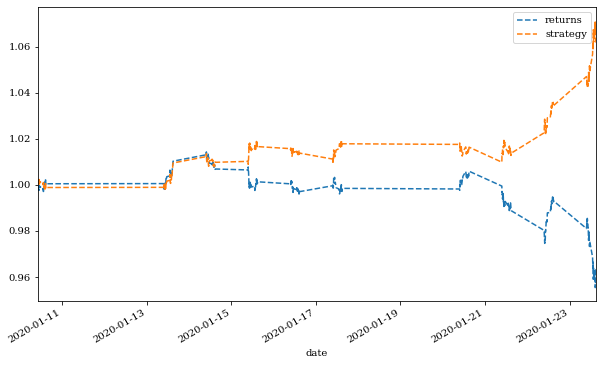

In [87]:
hs300_hf[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6),style=['--','--'])